In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [113]:
import os
import random

# Specify the folder containing your dataset
path = '/content/drive/MyDrive/BDA Anomaly detection/BDA_DATASET'

# List to store individual DataFrames for each file
dataframes = []

# Number of samples to read from each non-"Normal" category
samples_per_file = 1000

# Loop through each file in the specified directory
for file_name in os.listdir(path):
    if file_name.endswith('.csv') and file_name != 'data_names.csv':
        file_path = os.path.join(path, file_name)

        # Read the entire CSV file into a DataFrame
        df = pd.read_csv(file_path, low_memory=False)

        # Filter out rows where 'category' is "Normal"
        normal_samples = df[df['category'] == 'Normal']

        # Sample `samples_per_file` rows from non-"Normal" categories
        non_normal_samples = df[df['category'] != 'Normal']
        random_samples = non_normal_samples.sample(n=samples_per_file, random_state=42)

        # Concatenate normal and random non-normal samples
        merged_df = pd.concat([normal_samples, random_samples], ignore_index=True)

        # Append the resulting DataFrame to the list
        dataframes.append(merged_df)

# Concatenate all DataFrames from the list into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [114]:
df.head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.3,NaN,4,240,...,2,2,120,120,0.002508,0.000836,0.000836,0,Normal,Normal
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,...,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,...,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
3,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,...,5,5,210,300,0.006189,0.002751,0.002751,0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,...,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19278 entries, 0 to 19277
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pkSeqID       19278 non-null  int64  
 1   stime         19278 non-null  float64
 2   flgs          19278 non-null  object 
 3   proto         19278 non-null  object 
 4   saddr         19278 non-null  object 
 5   sport         18867 non-null  object 
 6   daddr         19278 non-null  object 
 7   dport         18867 non-null  object 
 8   pkts          19278 non-null  int64  
 9   bytes         19278 non-null  int64  
 10  state         19278 non-null  object 
 11  ltime         19278 non-null  float64
 12  seq           19278 non-null  int64  
 13  dur           19278 non-null  float64
 14  mean          19278 non-null  float64
 15  stddev        19278 non-null  float64
 16  smac          0 non-null      float64
 17  dmac          0 non-null      float64
 18  sum           19278 non-nu

In [116]:
df.isnull().sum()

,0
pkSeqID,0
stime,0
flgs,0
proto,0
saddr,0
sport,411
daddr,0
dport,411
pkts,0
bytes,0


In [117]:
df=df.drop(columns = ['pkSeqID', 'stime', 'ltime', 'seq', 'smac',  'dmac', 'soui', 'doui', 'sco', 'dco', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'srate', 'drate', 'attack', 'subcategory '])

In [118]:
df.isnull().sum()

,0
flgs,0
proto,0
saddr,0
sport,411
daddr,0
dport,411
pkts,0
bytes,0
state,0
dur,0


In [119]:
df.select_dtypes(include=['object']).columns

Index(['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state',
       'category'],
      dtype='object')

In [120]:
df.isna().sum()

,0
flgs,0
proto,0
saddr,0
sport,411
daddr,0
dport,411
pkts,0
bytes,0
state,0
dur,0


In [121]:
df.shape

(19278, 17)

In [122]:
df = df.dropna(subset=['sport'])

In [123]:
df.shape

(18867, 17)

In [124]:
df = df.drop(columns = ['saddr', 'daddr',  'state', 'sport', 'dport'])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18867 entries, 1 to 19277
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flgs      18867 non-null  object 
 1   proto     18867 non-null  object 
 2   pkts      18867 non-null  int64  
 3   bytes     18867 non-null  int64  
 4   dur       18867 non-null  float64
 5   mean      18867 non-null  float64
 6   stddev    18867 non-null  float64
 7   sum       18867 non-null  float64
 8   min       18867 non-null  float64
 9   max       18867 non-null  float64
 10  rate      18867 non-null  float64
 11  category  18867 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 1.9+ MB


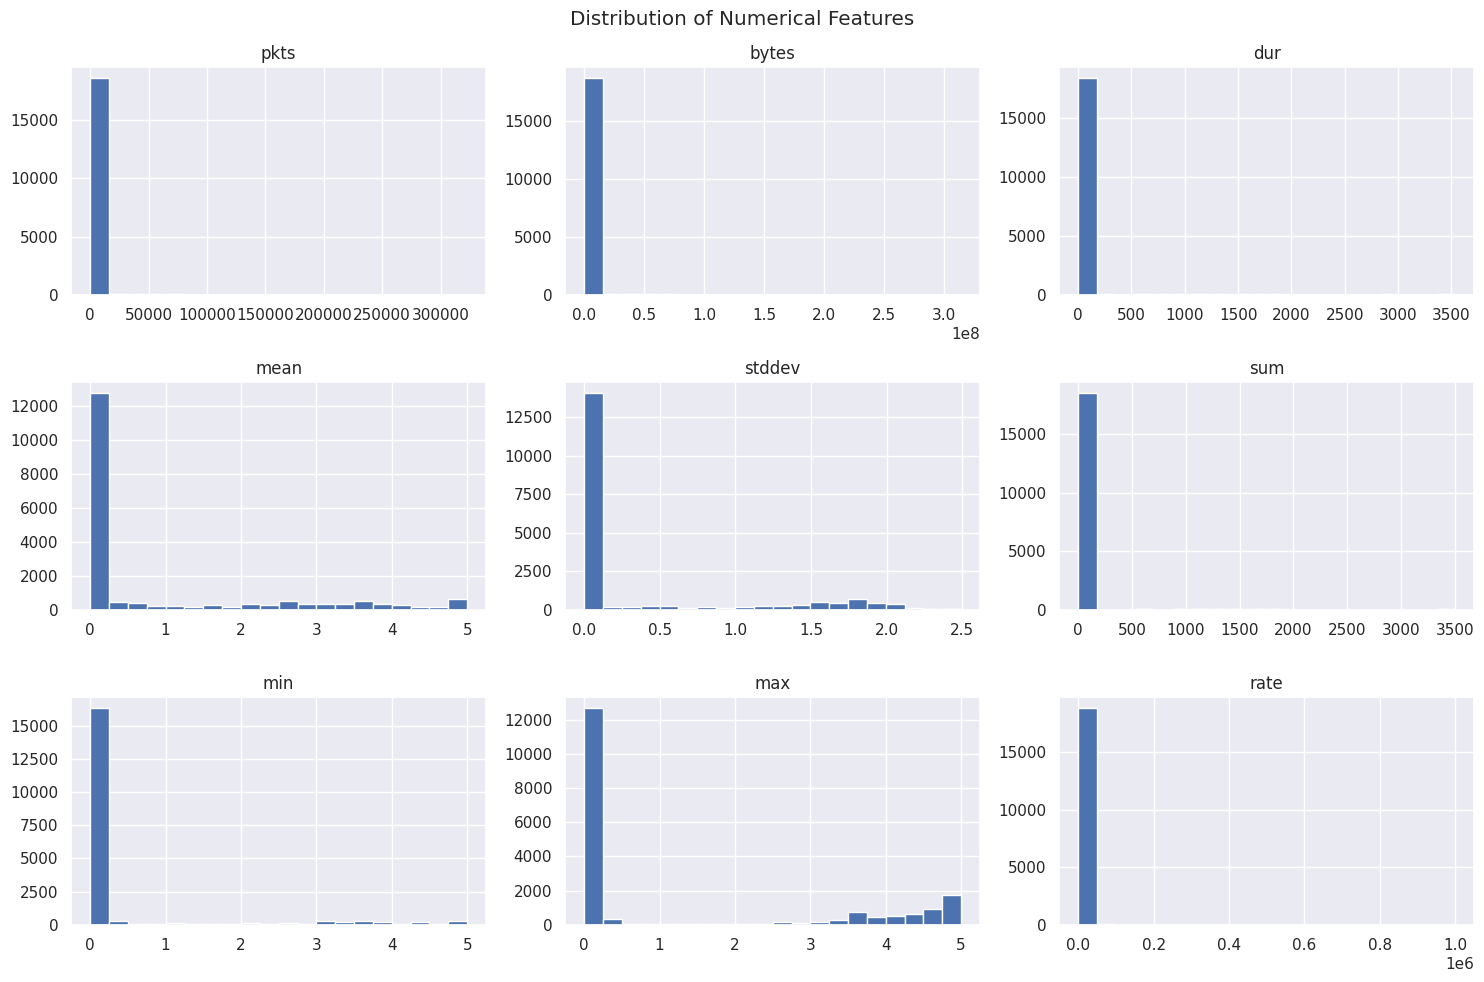

In [126]:
import seaborn as sns

# Set up the plotting style
sns.set_theme(style="darkgrid")

### 1. Distribution of Numerical Columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

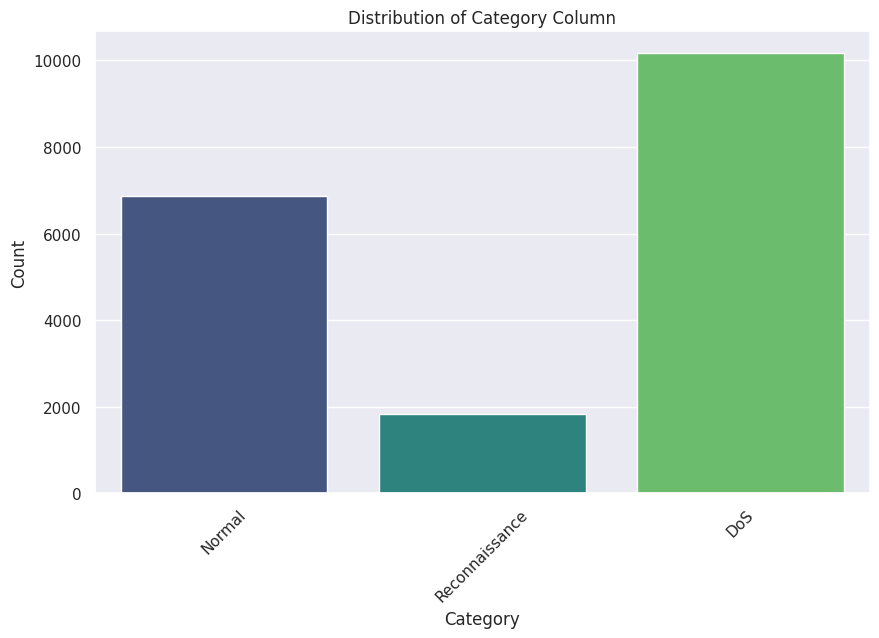

In [127]:
# Bar plot to show the count of each category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, hue='category', palette='viridis', legend=False)  # Changes here
plt.title('Distribution of Category Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

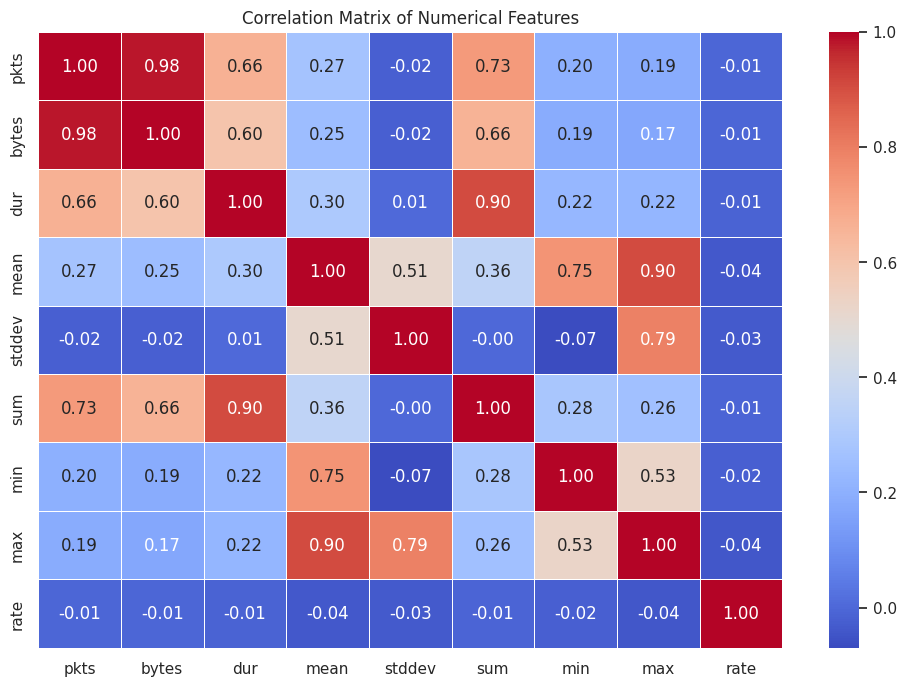

In [128]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

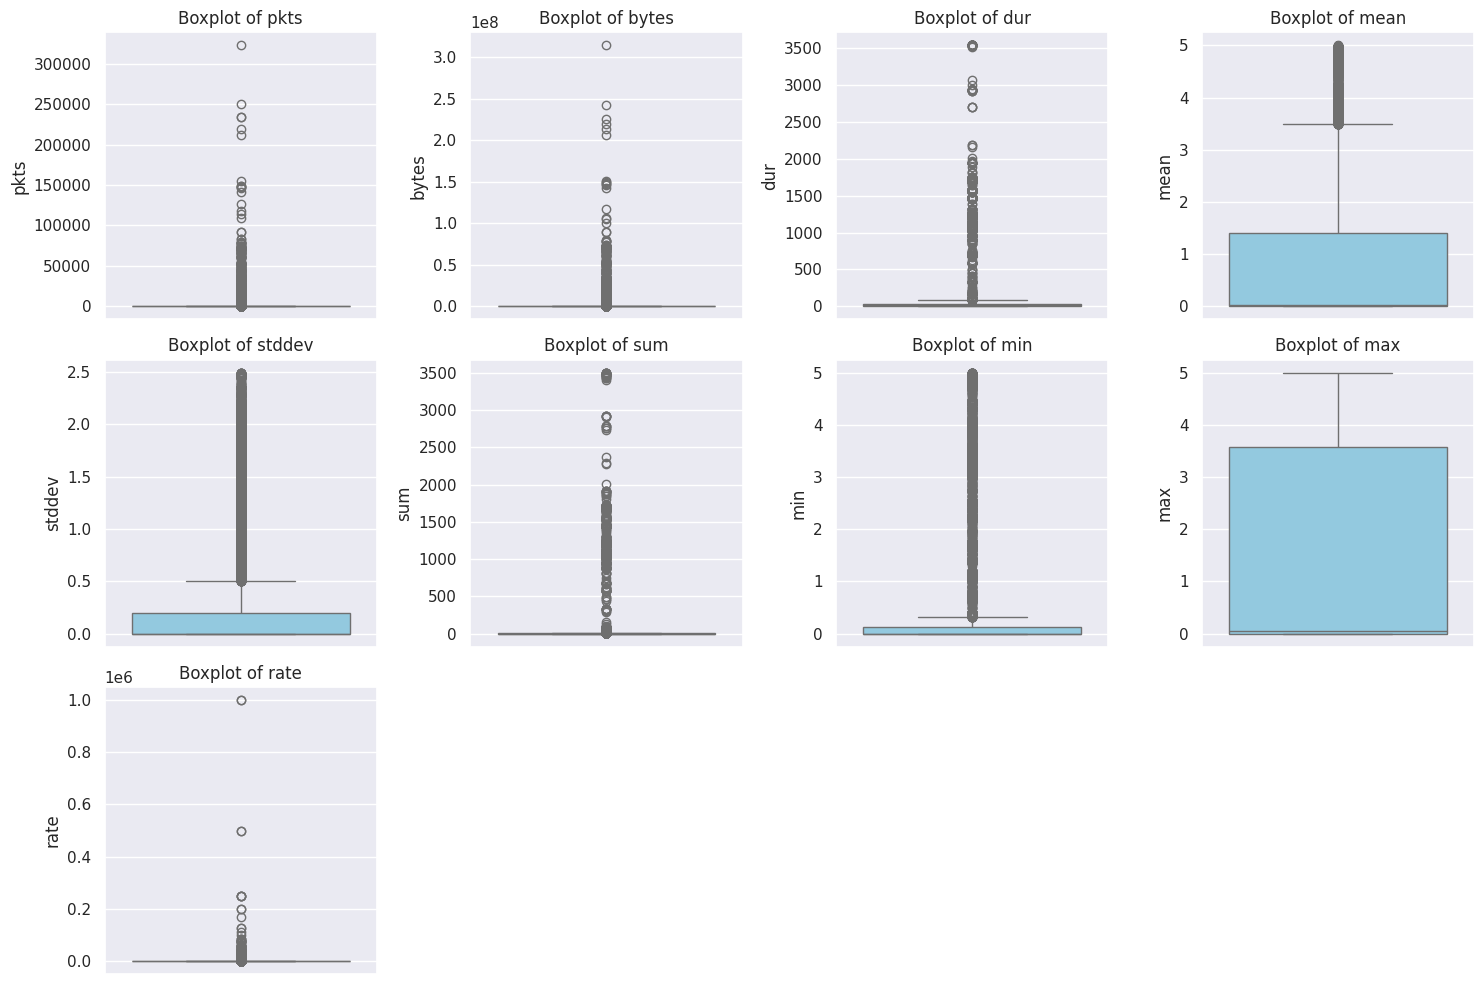

In [129]:
# Box plots for each numerical column to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18867 entries, 1 to 19277
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flgs      18867 non-null  object 
 1   proto     18867 non-null  object 
 2   pkts      18867 non-null  int64  
 3   bytes     18867 non-null  int64  
 4   dur       18867 non-null  float64
 5   mean      18867 non-null  float64
 6   stddev    18867 non-null  float64
 7   sum       18867 non-null  float64
 8   min       18867 non-null  float64
 9   max       18867 non-null  float64
 10  rate      18867 non-null  float64
 11  category  18867 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 1.9+ MB


In [131]:
df.flgs.value_counts()

,count
flgs,
e,13656
e s,3851
e g,1104
eU,146
e *,49
e &,40
e d,13
e F,7
e r,1


In [132]:
df.proto.value_counts()

,count
proto,
udp,11137
tcp,7600
ipv6-icmp,73
icmp,57


In [136]:
df.tail(1)

,flgs,proto,pkts,bytes,dur,mean,stddev,sum,min,max,rate,category
19277,e s,tcp,10,724,5.007181,0.104569,0.103325,0.209138,0.001244,0.207894,1.797418,Reconnaissance


In [134]:
# Save the processed DataFrame to a new CSV file in your Google Drive
df.to_csv('/content/drive/MyDrive/BDA Anomaly detection/processed_data_2.csv', index=False)

In [80]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['flgs'] = label_encoder.fit_transform(df['flgs'])
df['proto'] = label_encoder.fit_transform(df['proto'])

In [81]:
df.loc[(df['category'] != 'Normal'), 'category'] = 'Attack'
df.loc[(df['category'] == 'Normal'), 'category'] = 'Normal'

In [82]:
df.category.value_counts()

,count
category,
Attack,11997
Normal,6870


In [83]:
# Assuming 'category' column has 'Normal' and 'Attack' values
df['category'] = df['category'].map({'Normal': 0, 'Attack': 1})

In [86]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'category' is the target variable
X = df.drop('category', axis=1)  # Features
y = df['category']  # Target variable

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
X.columns

Index(['flgs', 'proto', 'pkts', 'bytes', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'rate'],
      dtype='object')

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

def evaluate_model(y_true, y_pred, y_prob=None):

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Model Evaluation Metrics:")
    print("-"*50)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
    # Confusion Matrix Heatmap
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print()
    # ROC AUC Curve (for binary or multi-class with probabilities provided)
    if y_prob is not None and len(np.unique(y_true)) == 2:
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_true, y_prob)
        fpr, tpr, _ = roc_curve(y_true, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC AUC Curve")
        plt.legend()
        plt.show()
    elif y_prob is not None and len(np.unique(y_true)) > 2:
        print("Note: ROC AUC plot requires binary classification. Multiclass ROC AUC not shown.")


In [89]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get predicted probabilities for ROC AUC calculation
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [91]:
# prompt: save the model using pickel

import pickle

# Save the trained model to a file
filename = '/content/drive/MyDrive/BDA Anomaly detection/random_forest_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

Evaluation on Training Data:

Model Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.9980311979403301
Precision: 0.9980372809888806
Recall: 0.9980311979403301
F1 Score: 0.998030057189234



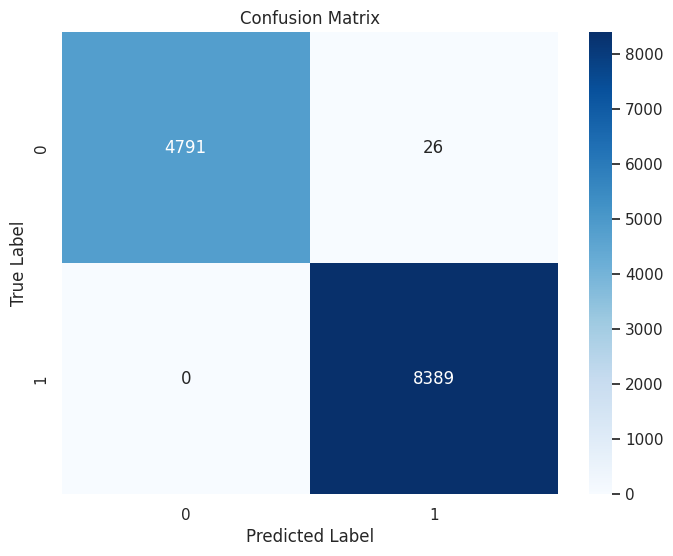

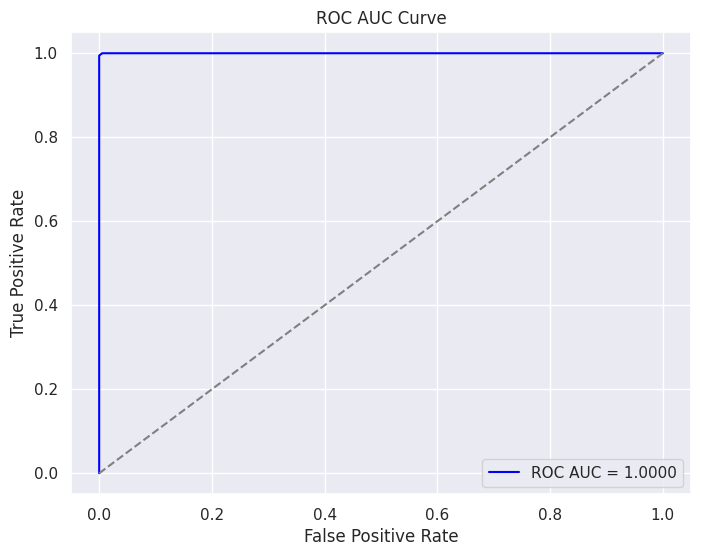

In [32]:
# Evaluate the model on the training data
y_train_pred = rf_model.predict(X_train)
y_train_prob = rf_model.predict_proba(X_train)[:, 1]

print("Evaluation on Training Data:")
print()
evaluate_model(y_train, y_train_pred, y_train_prob)

Evaluation on Testing Data:

Model Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.9962904080551139
Precision: 0.9962942409187042
Recall: 0.9962904080551139
F1 Score: 0.9962882488265244



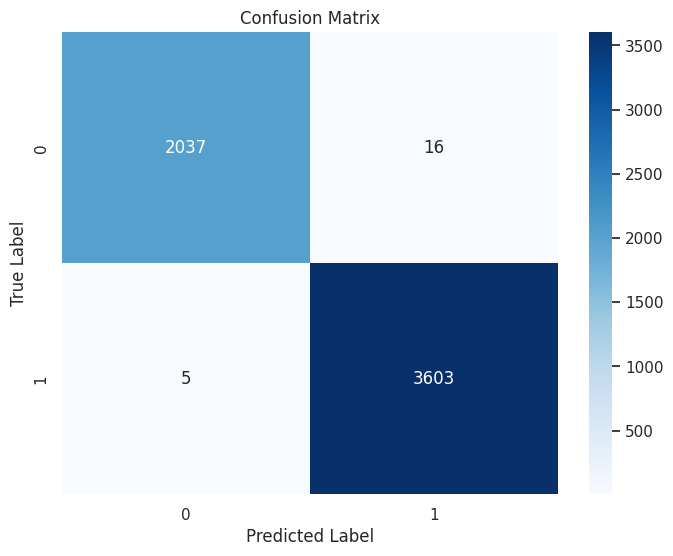

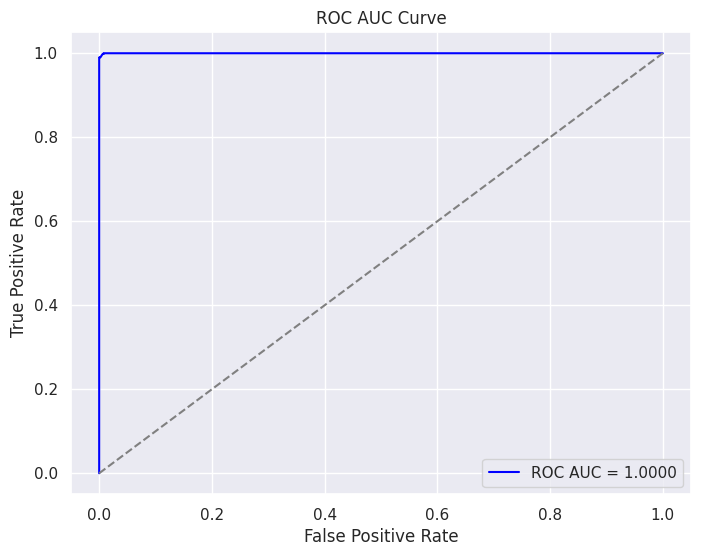

In [33]:
print("Evaluation on Testing Data:")
print()

# Evaluate the model
evaluate_model(y_test, y_pred, y_prob=y_prob)

In [139]:
# prompt: test the model using test data take 3 instace and get the prediciton print weather it is normal or attact and also print the instaces take the data from x_test

import numpy as np

# Load the saved model
loaded_model = pickle.load(open('/content/drive/MyDrive/BDA Anomaly detection/random_forest_model.sav', 'rb'))

# Take 3 random instances from X_test
random_indices = np.random.choice(X_test.index, size=3, replace=False)
test_instances = X_test.loc[random_indices]

# Get predictions for the selected instances
predictions = loaded_model.predict(test_instances)

# Print the instances and predictions
for i, instance in test_instances.iterrows():
    prediction = predictions[test_instances.index.get_loc(i)]
    print(f"Instance:\n{instance}\n")
    print(f"Prediction: {'Attack' if prediction == 1 else 'Normal'}\n")

Instance:
flgs        5.000000
proto       2.000000
pkts        6.000000
bytes     548.000000
dur        27.539928
mean        0.153403
stddev      0.011244
sum         0.306807
min         0.142160
max         0.164647
rate        0.181555
Name: 4088, dtype: float64

Prediction: Attack

Instance:
flgs        7.000000
proto       2.000000
pkts        4.000000
bytes     428.000000
dur        19.167521
mean        0.052295
stddev      0.011078
sum         0.104589
min         0.041217
max         0.063372
rate        0.156515
Name: 7527, dtype: float64

Prediction: Attack

Instance:
flgs        0.000000
proto       3.000000
pkts        2.000000
bytes     176.000000
dur         5.047686
mean        0.000000
stddev      0.000000
sum         0.000000
min         0.000000
max         0.000000
rate        0.198111
Name: 17509, dtype: float64

Prediction: Normal

